<a href="https://colab.research.google.com/github/N34R20/Ciencia-de-Datos-DH/blob/main/Modelos_basicos_final_dh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install statsmodels
%pip install statsmodels.tsa

ERROR: Could not find a version that satisfies the requirement statsmodels.tsa (from versions: none)
ERROR: No matching distribution found for statsmodels.tsa


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import missingno as msn
import seaborn as sns
from datetime import date
import sklearn
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.seasonal import seasonal_decompose
import shapely
import calendar



In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
path_dataset_final = '/content/drive/MyDrive/Data /dataset_final.csv'
df = pd.read_csv(path_dataset_final)
df

,Unnamed: 0,causa,rol,tipo,sexo,edad,fecha,hora,tipo_calle,geocodificacion,...,comuna,tipo_colision1,participantes_victimas,participantes_acusados,month,year,day,day_of_week,geometry,barrio
0,0,homicidio,conductor,moto,masculino,18.0,2015-01-01,2,avenida,point(107881.450960282 101307.802557128),...,1.0,motovehiculo - vehiculo,moto,automovil,1,2015,1,3,POINT (-58.37736201 -34.61745115),MONSERRAT
1,1,lesiones,pasajero,automovil,masculino,26.0,2015-01-01,7,calle,POINT(99434.1139023 99998.2519356),...,7.0,vehiculo - vehiculo,automovil,automovil,1,2015,1,3,POINT (-58.46947105 -34.6292856),FLORES
2,2,homicidio,conductor,moto,masculino,24.0,2015-03-14,4,avenida,point(94030.4783360778 97680.9200807321),...,9.0,motovehiculo - motovehiculo,moto,moto,3,2015,14,5,POINT (-58.52841602 -34.65015732),LINIERS
3,3,lesiones,conductor,moto,masculino,37.0,2015-04-01,15,avenida,POINT(104578.721381 104043.896923),...,14.0,vehiculo - motovehiculo,moto,automovil,4,2015,1,2,POINT (-58.41338878 -34.5928067),PALERMO
4,4,homicidio,pasajero,automovil,masculino,19.0,2015-08-14,2,avenida,point(103286.903159354 107774.354385908),...,14.0,vehiculo - vehiculo,automovil,automovil,8,2015,14,4,POINT (-58.42748462 -34.55918365),PALERMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26131,26131,lesiones,peaton,peaton,masculino,11.0,2017-12-12,17,calle,point(102464.785026 104303.334298),...,15.0,motovehiculo - peaton,peaton,moto,12,2017,12,1,POINT (-58.43643274 -34.59047523),VILLA CRESPO
26132,26132,lesiones,ciclista,bicicleta,femenino,17.0,2017-12-14,16,calle,point(104370.266665253 104649.02576906),...,14.0,bicicleta - vehiculo,bicicleta,automovil,12,2017,14,3,POINT (-58.41566423 -34.58735279),PALERMO
26133,26133,lesiones,peaton,peaton,femenino,3.0,2017-12-16,18,calle,point(108516.345434 102125.539587),...,1.0,peaton - vehiculo,peaton,taxi/remis,12,2017,16,5,POINT (-58.37044742 -34.61007472),MONSERRAT
26134,26134,lesiones,peaton,peaton,masculino,5.0,2017-12-16,12,calle,point(98886.2980366 93738.9567445),...,8.0,motovehiculo - peaton,peaton,moto,12,2017,16,5,POINT (-58.4754538 -34.68570845),VILLA RIACHUELO


In [ ]:
df.drop(columns=['geometry'], inplace=True)

Para cada modelo:

- Lo *definimos*. 

- Lo *ajustamos* a los datos de train.

- Lo *evaluamos* usado RMSE sobre los datos de test.

- Lo *comparamos* con otros modelos.

In [ ]:
df_grouped = df.groupby(by = ['year', 'month']).size().reset_index()
df_grouped['y'] = df_grouped[0]
df_grouped.drop(columns=[0], inplace=True)
#df_grouped = df_grouped.set_index('fecha')
X = df_grouped[['year', 'month']]
Y = df_grouped[['y']]

print(X.columns)
print(Y.columns)
df_grouped

Index(['year', 'month'], dtype='object')
Index(['y'], dtype='object')


,year,month,y
0,2015,1,587
1,2015,2,661
2,2015,3,817
3,2015,4,799
4,2015,5,839
5,2015,6,699
6,2015,7,767
7,2015,8,722
8,2015,9,809
9,2015,10,728


In [ ]:
df_grouped['year_month'] = df_grouped.apply(lambda row: date(int(row['year']),int(row['month']),1), axis =1 )

In [ ]:
df_grouped['year_month_last_year'] = df_grouped['year_month'] - relativedelta(years = 1)

In [ ]:
df_grouped.reset_index(drop = True, inplace = True)
df_grouped['year_month'] = pd.to_datetime(df_grouped['year_month'])

In [ ]:
date_time_index = pd.date_range('2015-01-01','2017-12-01', freq = 'MS')

In [ ]:
df_grouped = df_grouped.set_index(date_time_index)

In [ ]:
df_grouped

,year,month,y,year_month,year_month_last_year
2015-01-01,2015,1,587,2015-01-01,2014-01-01
2015-02-01,2015,2,661,2015-02-01,2014-02-01
2015-03-01,2015,3,817,2015-03-01,2014-03-01
2015-04-01,2015,4,799,2015-04-01,2014-04-01
2015-05-01,2015,5,839,2015-05-01,2014-05-01
2015-06-01,2015,6,699,2015-06-01,2014-06-01
2015-07-01,2015,7,767,2015-07-01,2014-07-01
2015-08-01,2015,8,722,2015-08-01,2014-08-01
2015-09-01,2015,9,809,2015-09-01,2014-09-01
2015-10-01,2015,10,728,2015-10-01,2014-10-01


<Figure size 1152x720 with 0 Axes>

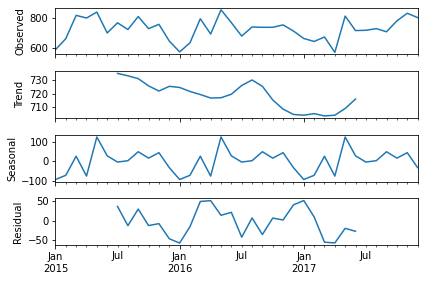

In [ ]:
import statsmodels.api as sm
plt.figure(figsize=(16,10))
decomposition = sm.tsa.seasonal_decompose(df_grouped['y'], model='additive')
decomposition.plot()
plt.show()

In [ ]:
def RMSE(predicted, actual):
    mse = (predicted - actual) ** 2
    rmse = np.sqrt(mse.sum() / mse.count())
    return rmse

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_grouped, test_size=12, random_state=42, shuffle=False)

In [ ]:
df_train

,year,month,y,year_month,year_month_last_year
2015-01-01,2015,1,587,2015-01-01,2014-01-01
2015-02-01,2015,2,661,2015-02-01,2014-02-01
2015-03-01,2015,3,817,2015-03-01,2014-03-01
2015-04-01,2015,4,799,2015-04-01,2014-04-01
2015-05-01,2015,5,839,2015-05-01,2014-05-01
2015-06-01,2015,6,699,2015-06-01,2014-06-01
2015-07-01,2015,7,767,2015-07-01,2014-07-01
2015-08-01,2015,8,722,2015-08-01,2014-08-01
2015-09-01,2015,9,809,2015-09-01,2014-09-01
2015-10-01,2015,10,728,2015-10-01,2014-10-01


In [ ]:
df_test

,year,month,y,year_month,year_month_last_year
2017-01-01,2017,1,662,2017-01-01,2016-01-01
2017-02-01,2017,2,642,2017-02-01,2016-02-01
2017-03-01,2017,3,672,2017-03-01,2016-03-01
2017-04-01,2017,4,569,2017-04-01,2016-04-01
2017-05-01,2017,5,812,2017-05-01,2016-05-01
2017-06-01,2017,6,715,2017-06-01,2016-06-01
2017-07-01,2017,7,717,2017-07-01,2016-07-01
2017-08-01,2017,8,728,2017-08-01,2016-08-01
2017-09-01,2017,9,707,2017-09-01,2016-09-01
2017-10-01,2017,10,780,2017-10-01,2016-10-01


# Primer modelo relative delta

In [ ]:
df_1_grouped = df.groupby(by = ['month','year']).size().reset_index()
df_1_grouped

,month,year,0
0,1,2015,587
1,1,2016,572
2,1,2017,662
3,2,2015,661
4,2,2016,633
5,2,2017,642
6,3,2015,817
7,3,2016,794
8,3,2017,672
9,4,2015,799


In [ ]:
df_1_grouped['year_month'] = df_1_grouped.apply(lambda row: date(int(row['year']),int(row['month']),1), axis =1 )

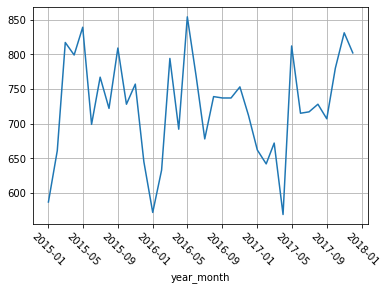

In [ ]:
df_1_grouped.sort_values(by = 'year_month').set_index('year_month')[0].plot()
plt.xticks(rotation = -45)
plt.grid()
plt.show()

In [ ]:
df_1_grouped['year_month_last_year'] =  df_1_grouped['year_month'] - relativedelta(years = 1)

In [ ]:
df_forecasting_baseline =\
df_1_grouped.merge(df_1_grouped[['year_month',0]], 
                          left_on = 'year_month_last_year', 
                          right_on = 'year_month',
                          how = 'left').sort_values(by = 'year_month_x').dropna()

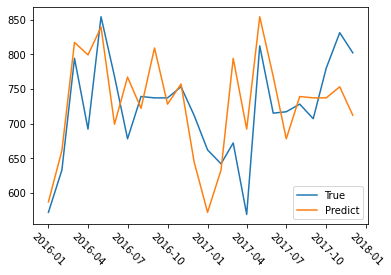

In [ ]:
plt.plot(df_forecasting_baseline['year_month_x'], df_forecasting_baseline['0_x'], label = 'True')
plt.plot(df_forecasting_baseline['year_month_x'], df_forecasting_baseline['0_y'], label = 'Predict')

plt.legend()
plt.xticks(rotation =-45)
plt.show()

In [ ]:
df_forecasting_baseline['relative_error'] =\
np.abs(df_forecasting_baseline['0_x'] - df_forecasting_baseline['0_y']) / df_forecasting_baseline['0_x']

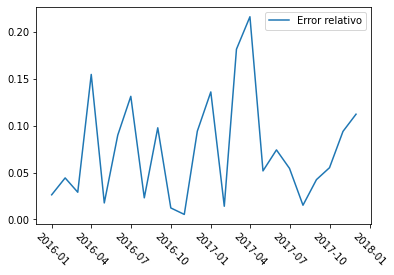

In [ ]:
plt.plot(df_forecasting_baseline['year_month_x'], 
         df_forecasting_baseline['relative_error'],
         label = 'Error relativo')

plt.legend()
plt.xticks(rotation =-45)
plt.show()

In [ ]:
df_forecasting_baseline['relative_error'].mean()

0.07382213238505034

# Random walk

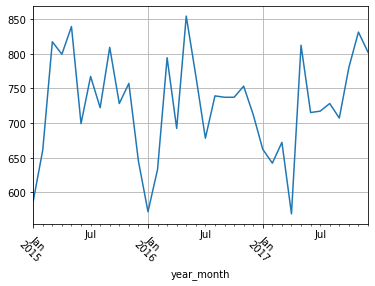

In [ ]:
df_grouped.sort_values(by = 'year_month').set_index('year_month')['y'].plot()
plt.xticks(rotation = -45)
plt.grid()
plt.show()

In [ ]:
df_train["countshift"] = df_train.y.shift()

# La primera observación nos va a quedar en nan, la reemplazamos por el valor siguente:
df_train["countshift"].fillna(method='bfill', inplace=True)

In [ ]:
df_test["countshift"] = df_test.y.shift()

df_test["countshift"].fillna(method='bfill', inplace=True)
df_test.head(3)

,year,month,y,year_month,year_month_last_year,countshift
2017-01-01,2017,1,662,2017-01-01,2016-01-01,662.0
2017-02-01,2017,2,642,2017-02-01,2016-02-01,662.0
2017-03-01,2017,3,672,2017-03-01,2016-03-01,642.0


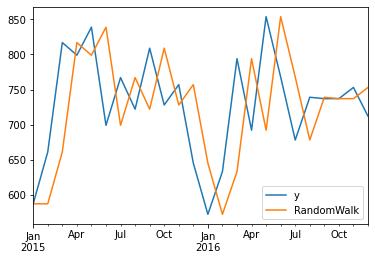

In [ ]:
df_train["RandomWalk"] = df_train.countshift
df_train.plot(kind="line", y = ["y", "RandomWalk"]);

In [ ]:
df_test["RandomWalk"] = pd.Series(df_train["y"][-1], index=df_test.index)

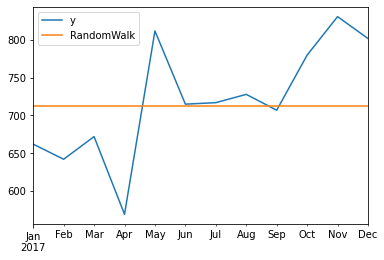

In [ ]:
# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df_test.plot(kind="line", y = ["y", "RandomWalk"]);

In [ ]:
# Calculamos el RMSE y almacenamos los resultados
df_Results = pd.DataFrame(columns = ["Model", "RMSE"])
df_Results.loc[0, "Model"] = "Random Walk"
df_Results.loc[0, "RMSE"] = RMSE(df_test.RandomWalk, df_test.y)
df_Results

,Model,RMSE
0,Random Walk,74.525723


# Media Constante

In [ ]:
model_mean_pred = df_train['y'].mean()
model_mean_pred

729.125

In [ ]:
df_train_mc = df_train.copy()
df_train_mc['Mean'] = model_mean_pred

df_test_mc = df_test.copy()
df_test_mc['Mean'] = model_mean_pred

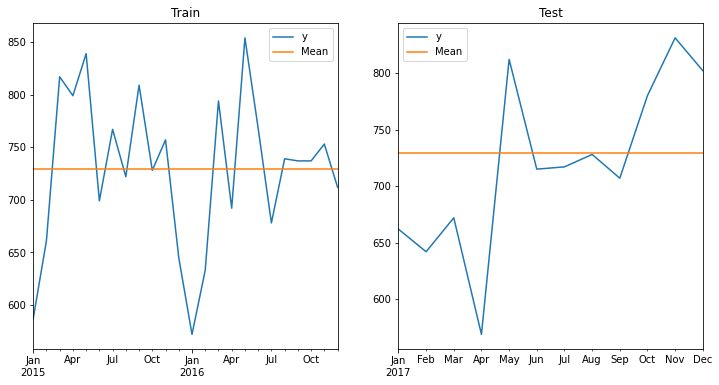

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(12,6))
df_train_mc.plot(ax=axes[0], y = ["y","Mean"],title='Train')
df_test_mc.plot(ax=axes[1],y = ["y","Mean"], title='Test')
plt.show()

In [ ]:
model_RMSE = RMSE(df_test_mc.Mean, df_test_mc.y)

In [ ]:
df_Results.loc[1, "Model"] = "Mean"
df_Results.loc[1, "RMSE"] = model_RMSE
df_Results.head()

,Model,RMSE
0,Random Walk,74.525723
1,Mean,74.712191


# Tendencia lineal

In [ ]:
df_grouped["timeIndex"] = pd.Series(np.arange(len(df_grouped['y'])), index=df_grouped.index)
df_grouped.timeIndex.head()

2015-01-01    0
2015-02-01    1
2015-03-01    2
2015-04-01    3
2015-05-01    4
Freq: MS, Name: timeIndex, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_grouped, test_size=12, random_state=42, shuffle=False)

In [ ]:
import statsmodels.api as sm
sm.OLS.from_formula

<bound method Model.from_formula of <class 'statsmodels.regression.linear_model.OLS'>>

In [ ]:
import statsmodels.formula.api as smf
model_linear = smf.ols(formula='y ~ timeIndex', data = df_train).fit()

In [ ]:
df_train["LinearTrend"] = model_linear.predict(df_train.timeIndex)
df_test["LinearTrend"] = model_linear.predict(df_test.timeIndex)

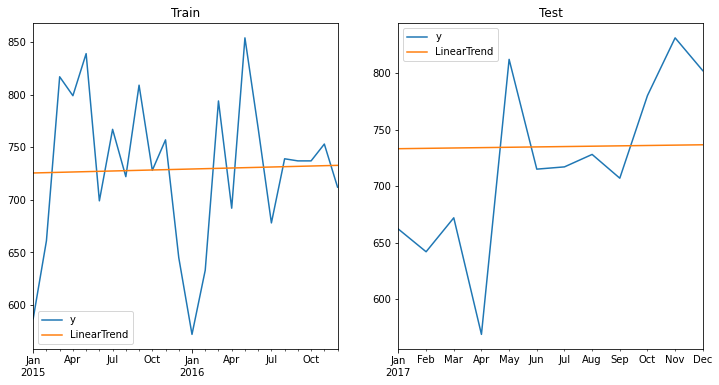

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(12,6))
df_train.plot(kind = "line", y = ["y","LinearTrend"],ax=axes[0],title='Train');
df_test.plot(kind = "line", y = ["y","LinearTrend"],ax=axes[1],title='Test');
plt.show()

In [ ]:
model_RMSE = RMSE(df_test.LinearTrend, df_test.y)

In [ ]:
df_Results.loc[2, "Model"] = "LinearTrend"
df_Results.loc[2, "RMSE"] = model_RMSE
df_Results.head()

,Model,RMSE
0,Random Walk,74.525723
1,Mean,74.712191
2,LinearTrend,74.86737


In [ ]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                   0.01990
Date:                Tue, 15 Mar 2022   Prob (F-statistic):              0.889
Time:                        20:51:51   Log-Likelihood:                -136.88
No. Observations:                  24   AIC:                             277.8
Df Residuals:                      22   BIC:                             280.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    725.5000     29.996     24.186      0.000     663.292     787.708
timeIndex      0.3152      2.235      0.141      0.889      -4.319       4.950
==============================================================================
Omnibus:                        0.688   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.709   Jarque-Bera (JB):                0.683
Skew:                          -0.347   Prob(JB):                        0.711
Kurtosis:                       2.552   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Tendencia cuadratica

In [ ]:
df_grouped["timeIndex_sq"] = df_grouped["timeIndex"]**2
df_grouped.timeIndex_sq.head(3)

2015-01-01    0
2015-02-01    1
2015-03-01    4
Freq: MS, Name: timeIndex_sq, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_grouped, test_size=12, random_state=42, shuffle=False)

In [ ]:
import statsmodels.formula.api as smf
model_quadratic = smf.ols('y ~ timeIndex + timeIndex_sq', data = df_train).fit()

In [ ]:
df_train["QuadraticTrend"] = model_quadratic.predict(df_train[["timeIndex","timeIndex_sq"]])
df_test["QuadraticTrend"] = model_quadratic.predict(df_test[["timeIndex","timeIndex_sq"]])

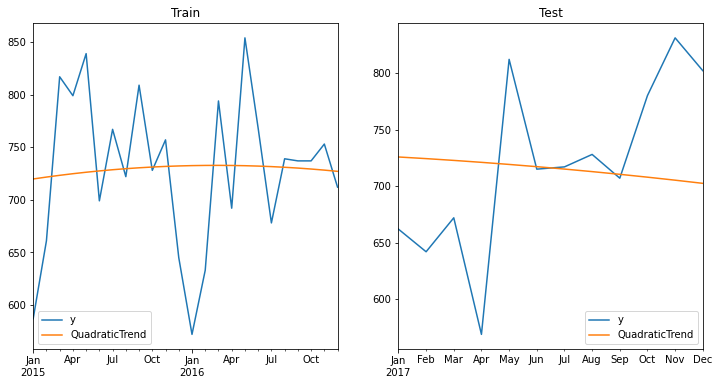

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(12,6))
df_train.plot(kind = "line", y = ["y","QuadraticTrend"],ax=axes[0],title='Train');
df_test.plot(kind = "line", y = ["y","QuadraticTrend"],ax=axes[1],title='Test');
plt.show()

In [ ]:
model_RMSE = RMSE(df_test.QuadraticTrend, df_test.y)

In [ ]:
df_Results.loc[3, "Model"] = "QuadraticTrend"
df_Results.loc[3, "RMSE"] = model_RMSE
df_Results.head()

,Model,RMSE
0,Random Walk,74.525723
1,Mean,74.712191
2,LinearTrend,74.86737
3,QuadraticTrend,79.74297


In [ ]:
model_quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.093
Method:                 Least Squares   F-statistic:                   0.02617
Date:                Tue, 15 Mar 2022   Prob (F-statistic):              0.974
Time:                        20:51:51   Log-Likelihood:                -136.86
No. Observations:                  24   AIC:                             279.7
Df Residuals:                      21   BIC:                             283.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      719.8019     43.765     16.447      0.000     628.788     810.816
timeIndex        1.8692      8.814      0.212      0.834     -16.461      20.199
timeIndex_sq    -0.0676      0.370     -0.183      0.857      -0.837       0.702
==============================================================================
Omnibus:                        0.730   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.694   Jarque-Bera (JB):                0.705
Skew:                          -0.359   Prob(JB):                        0.703
Kurtosis:                       2.566   Cond. No.                         686.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Tendencia con tranformacion logaritmica

In [ ]:
df_train['log_y'] = np.log(df_train['y'])
df_test['log_y'] = np.log(df_test['y'])

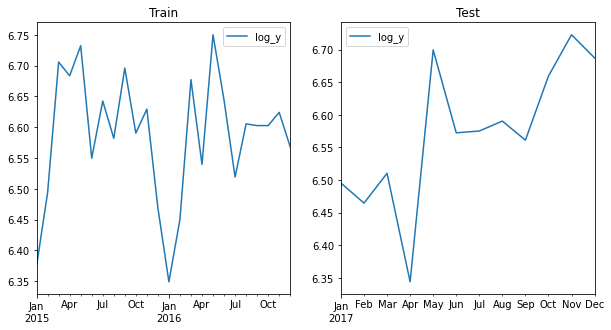

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(10,5))
df_train.plot(kind = "line", y = ["log_y"],ax=axes[0],title='Train');
df_test.plot(kind = "line", y = ["log_y"],ax=axes[1],title='Test');
plt.show()

Generamos el modelo de regresión lineal usando el logaritmo de Y

In [ ]:
import statsmodels.formula.api as smf
model_log = smf.ols('log_y ~ timeIndex ', data = df_train).fit()

Y las predicciones del modelo sobre *train y test*.

In [ ]:
df_train["LogTrend"] = model_log.predict(df_train[["timeIndex"]])
df_test["LogTrend"] = model_log.predict(df_test[["timeIndex"]])

Recuperamos el valor predicho de Y aplicando la función exponencial sobre las predicciones.

In [ ]:
df_train['back_LogTrend'] = np.exp(df_train['LogTrend'])
df_test['back_LogTrend'] = np.exp(df_test['LogTrend'])

Observamos visualmente las Y predichas vs el valor real.

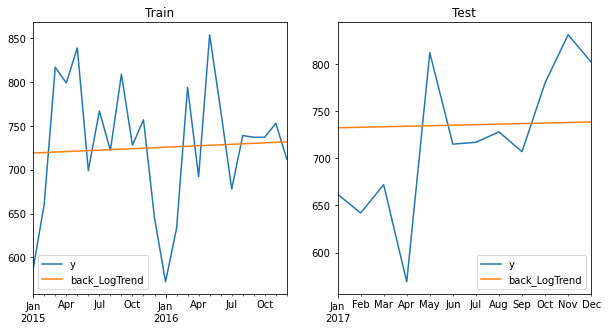

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(10,5))
df_train.plot(kind = "line", y = ["y","back_LogTrend"],ax=axes[0],title='Train');
df_test.plot(kind = "line", y = ["y","back_LogTrend"],ax=axes[1],title='Test');
plt.show()

In [ ]:
model_RMSE = RMSE(df_test.back_LogTrend, df_test.y)

In [ ]:
df_Results.loc[4, "Model"] = "back_LogTrend"
df_Results.loc[4, "RMSE"] = model_RMSE
df_Results.head()

,Model,RMSE
0,Random Walk,74.525723
1,Mean,74.712191
2,LinearTrend,74.86737
3,QuadraticTrend,79.74297
4,back_LogTrend,74.401168


In [ ]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                   0.05844
Date:                Tue, 15 Mar 2022   Prob (F-statistic):              0.811
Time:                        20:51:53   Log-Likelihood:                 20.626
No. Observations:                  24   AIC:                            -37.25
Df Residuals:                      22   BIC:                            -34.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5779      0.042    155.303      0.000       6.490       6.666
timeIndex      0.0008      0.003      0.242      0.811      -0.006       0.007
==============================================================================
Omnibus:                        1.650   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.227
Skew:                          -0.541   Prob(JB):                        0.541
Kurtosis:                       2.767   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformacion logaritmica con estacionalidad mensual

In [ ]:
# Creamos columna con el mes
df_train['month'] = [d.strftime('%b') for d in df_train.index]
df_test['month']  = [d.strftime('%b') for d in df_test.index]

In [ ]:
# Creamos las variables dummies de mes
dummies_mes_train = pd.get_dummies(df_train['month'])
dummies_mes_test = pd.get_dummies(df_test['month'])

In [ ]:
# Hacemos el join entre el DataFrame con la serie de tiempo y las dummies
df_train = df_train.join(dummies_mes_train)
df_test = df_test.join(dummies_mes_test)

In [ ]:
df_train.head(4)

,year,month,y,year_month,year_month_last_year,timeIndex,timeIndex_sq,QuadraticTrend,log_y,LogTrend,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
2015-01-01,2015,Jan,587,2015-01-01,2014-01-01,0,0,719.801923,6.375025,6.577920,...,0,0,1,0,0,0,0,0,0,0
2015-02-01,2015,Feb,661,2015-02-01,2014-02-01,1,1,721.603595,6.493754,6.578683,...,0,1,0,0,0,0,0,0,0,0
2015-03-01,2015,Mar,817,2015-03-01,2014-03-01,2,4,723.270135,6.705639,6.579446,...,0,0,0,0,0,1,0,0,0,0
2015-04-01,2015,Apr,799,2015-04-01,2014-04-01,3,9,724.801543,6.683361,6.580209,...,0,0,0,0,0,0,0,0,0,0


PREDICCION


In [ ]:
model_log_est = smf.ols('log_y ~ timeIndex + Apr + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep',\
                          data = df_train).fit()

In [ ]:
df_train['model_log_est'] = model_log_est.predict(df_train[["timeIndex","Apr","Aug", "Dec", "Feb", "Jan",\
                                               "Jul", "Jun", "Mar", "May","Nov", "Oct", "Sep"]])

df_test['model_log_est'] = model_log_est.predict(df_test[["timeIndex","Apr","Aug", "Dec", "Feb", "Jan",\
                                               "Jul", "Jun", "Mar", "May","Nov", "Oct", "Sep"]])

In [ ]:
df_train['back_LogEstTrend'] = np.exp(df_train['model_log_est'])
df_test['back_LogEstTrend'] = np.exp(df_test['model_log_est'])

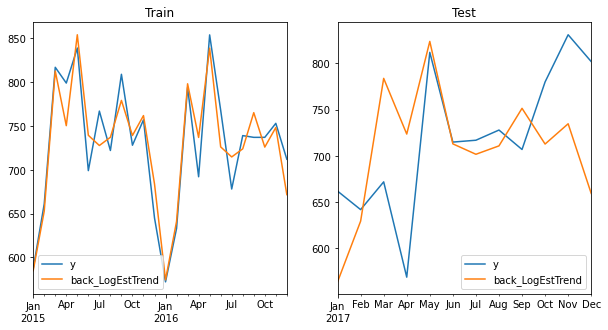

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(10,5))
df_train.plot(kind = "line", y = ["y","back_LogEstTrend"],ax=axes[0],title='Train');
df_test.plot(kind = "line", y = ["y","back_LogEstTrend"],ax=axes[1],title='Test');
plt.show()

In [ ]:
model_RMSE = RMSE(df_test.back_LogEstTrend, df_test.y)

In [ ]:
df_Results.loc[5, "Model"] = "back_LogEstTrend"
df_Results.loc[5, "RMSE"] = model_RMSE
df_Results.head()

,Model,RMSE
0,Random Walk,74.525723
1,Mean,74.712191
2,LinearTrend,74.86737
3,QuadraticTrend,79.74297
4,back_LogTrend,74.401168


In [ ]:
model_log_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     6.357
Date:                Tue, 15 Mar 2022   Prob (F-statistic):            0.00222
Time:                        20:51:55   Log-Likelihood:                 45.449
No. Observations:                  24   AIC:                            -64.90
Df Residuals:                      11   BIC:                            -49.58
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0960      0.022    278.190      0.000       6.048       6.144
timeIndex     -0.0015      0.002     -0.824      0.428      -0.006       0.003
Apr            0.5290      0.037     14.474      0.000       0.449       0.609
Aug            0.5172      0.037     14.097      0.000       0.436       0.598
Dec            0.4483      0.038     11.717      0.000       0.364       0.532
Feb            0.3866      0.037     10.442      0.000       0.305       0.468
Jan            0.2751      0.037      7.356      0.000       0.193       0.357
Jul            0.5029      0.037     13.771      0.000       0.423       0.583
Jun            0.5173      0.036     14.197      0.000       0.437       0.597
Mar            0.6074      0.037     16.531      0.000       0.527       0.688
May            0.6601      0.036     18.112      0.000       0.580       0.740
Nov            0.5548      0.038     14.701      0.000       0.472       0.638
Oct            0.5230      0.037     14.021      0.000       0.441       0.605
Sep            0.5743      0.037     15.541      0.000       0.493       0.656
==============================================================================
Omnibus:                        0.509   Durbin-Watson:                   2.455
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.583
Skew:                           0.000   Prob(JB):                        0.747
Kurtosis:                       2.236   Cond. No.                     1.61e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Media movil

In [ ]:
df_grouped["sma_5"] = df_grouped.y.rolling(5,min_periods=1).mean()
df_grouped["sma_15"] = df_grouped.y.rolling(15,min_periods=1).mean()

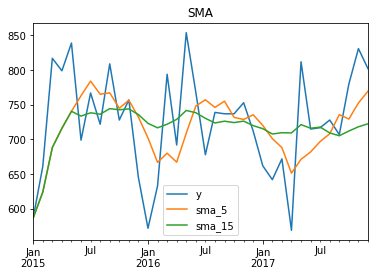

In [ ]:
df_grouped.plot(kind = "line", y = ["y","sma_5","sma_15"],title='SMA');

# Single Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_exp_smoothing_3 = SimpleExpSmoothing(df_train.y).fit(smoothing_level=0.3,optimized=False)
model_exp_smoothing_5 = SimpleExpSmoothing(df_train.y).fit(smoothing_level=0.5,optimized=False)
model_exp_smoothing_8 = SimpleExpSmoothing(df_train.y).fit(smoothing_level=0.8,optimized=False)

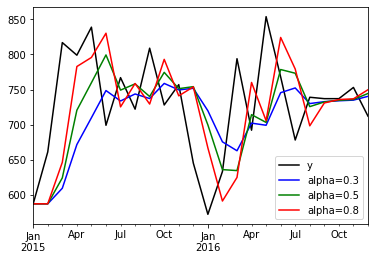

In [ ]:
df_train.plot(kind = "line", y = "y",color='black')
model_exp_smoothing_3.fittedvalues.plot(label="alpha=0.3",color='b');
model_exp_smoothing_5.fittedvalues.plot(label="alpha=0.5",color='g');
model_exp_smoothing_8.fittedvalues.plot(label="alpha=0.8",color='r');
plt.legend();

In [ ]:
df_test["Simple_Smoothing_3"] = model_exp_smoothing_3.forecast(len(df_test))
df_test["Simple_Smoothing_5"] = model_exp_smoothing_5.forecast(len(df_test))
df_test["Simple_Smoothing_8"] = model_exp_smoothing_8.forecast(len(df_test))

In [ ]:
model_RMSE_3 = RMSE(df_test["Simple_Smoothing_3"], df_test.y)
model_RMSE_5 = RMSE(df_test["Simple_Smoothing_5"], df_test.y)
model_RMSE_8 = RMSE(df_test["Simple_Smoothing_8"], df_test.y)

In [ ]:
# Calculamos el RMSE y almacenamos los resultados
df_Results.loc[6, "Model"] = "Simple Smoothing a=0.3"; df_Results.loc[6, "RMSE"] = model_RMSE_3
df_Results.loc[7, "Model"] = "Simple Smoothing a=0.5"; df_Results.loc[7, "RMSE"] = model_RMSE_5
df_Results.loc[8, "Model"] = "Simple Smoothing a=0.8"; df_Results.loc[8, "RMSE"] = model_RMSE_8
df_Results

,Model,RMSE
0,Random Walk,74.525723
1,Mean,74.712191
2,LinearTrend,74.86737
3,QuadraticTrend,79.74297
4,back_LogTrend,74.401168
5,back_LogEstTrend,83.122583
6,Simple Smoothing a=0.3,75.099038
7,Simple Smoothing a=0.5,74.602605
8,Simple Smoothing a=0.8,74.121932


# ARIMA

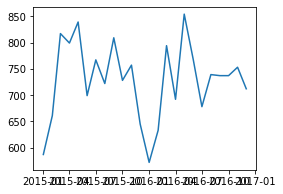

In [ ]:
plt.figure(figsize=(4,3)); plt.plot(df_train.year_month, df_train.y); plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_train['y']); 
print('ADF Statistic: %f' % result[0]); print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: -5.499251
p-value: 0.000002
Valor crítico 1%: -3.96
Valor crítico 5%: -3.08
Valor crítico 10%: -2.68


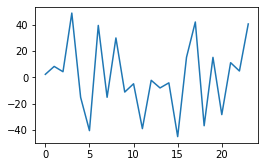

In [ ]:
res_model = df_train['y'] - df_train['back_LogEstTrend']
plt.figure(figsize=(4,2.5)); plt.plot(df_train.timeIndex, res_model, '-');plt.show()

In [ ]:
result = adfuller(res_model); print('ADF Statistic: %f' % result[0]); 
print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: -6.032410
p-value: 0.000000
Valor crítico 1%: -3.75
Valor crítico 5%: -3.00
Valor crítico 10%: -2.64


In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
import statsmodels.tsa.api as smt

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


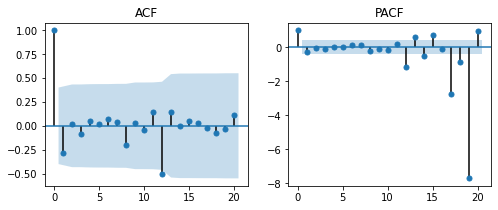

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(8,3))
smt.graphics.plot_acf(res_model, lags=20,ax=axes[0],title='ACF')
smt.graphics.plot_pacf(res_model, lags=20,ax=axes[1],title='PACF')
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model_ARIMA = ARIMA(res_model, order=(10,0,0))
results_ARIMA = model_ARIMA.fit()

In [ ]:
print(results_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                    ARMA(10, 0)   Log Likelihood                -109.762
Method:                       css-mle   S.D. of innovations             22.571
Date:                Tue, 15 Mar 2022   AIC                            243.524
Time:                        20:52:08   BIC                            257.660
Sample:                    01-01-2015   HQIC                           247.274
                         - 12-01-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6343      2.691     -0.607      0.554      -6.909       3.640
ar.L1.y       -0.4302      0.220     -1.956      0.072      -0.861       0.001
ar.L2.y       -0.2044      0.230     -0.890      0.3

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


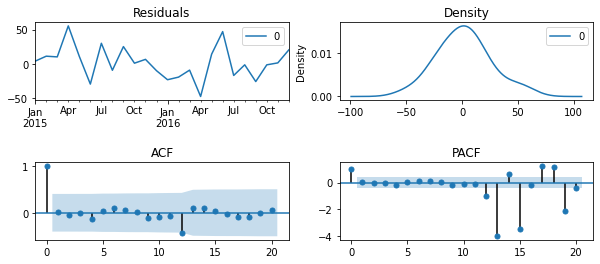

In [ ]:
residuals = pd.DataFrame(results_ARIMA.resid)
fig, axes = plt.subplots(2, 2,figsize=(10,4))

residuals.plot(title="Residuals", ax=axes[0,0]); 
residuals.plot(kind='kde', title='Density', ax=axes[0,1])
smt.graphics.plot_acf(residuals, lags=20,ax=axes[1,0],title='ACF'); 
smt.graphics.plot_pacf(residuals, lags=20,ax=axes[1,1],title='PACF')
plt.subplots_adjust(hspace=0.8)
plt.show()

In [ ]:
predictions_ARIMA, se, conf = results_ARIMA.forecast(len(df_test['y']), alpha=0.05)

In [ ]:
df_train['model_ARIMA'] = df_train['y'] + results_ARIMA.fittedvalues
df_test['model_ARIMA'] = df_test['y'] + predictions_ARIMA

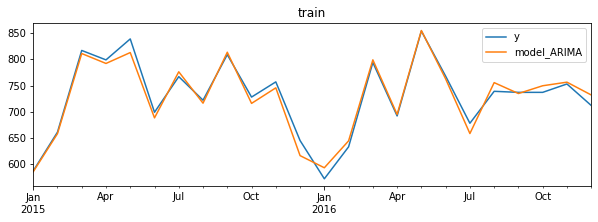

In [ ]:
df_train.plot(kind = "line", y = ['y', 'model_ARIMA'],figsize=(10,3), title='train');

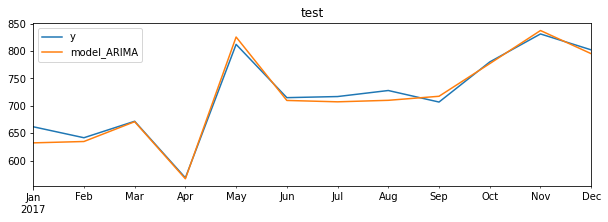

In [ ]:
df_test.plot(kind = "line", y = ['y', 'model_ARIMA'],figsize=(10,3), title='test');

In [ ]:
df_Results.loc[9, "Model"] = "Log Model + est + ARIMA"
df_Results.loc[9, "RMSE"] = RMSE(df_test['model_ARIMA'], df_test['y'])
df_Results

,Model,RMSE
0,Random Walk,74.525723
1,Mean,74.712191
2,LinearTrend,74.86737
3,QuadraticTrend,79.74297
4,back_LogTrend,74.401168
5,back_LogEstTrend,83.122583
6,Simple Smoothing a=0.3,75.099038
7,Simple Smoothing a=0.5,74.602605
8,Simple Smoothing a=0.8,74.121932
9,Log Model + est + ARIMA,12.020735
